#**Advance ML Homework_4_ Decission Tree Classifier**

Simulasi tugas Mesin Learning Lanjut dengan Python

In [1]:
import numpy as np
import pandas as pd
!pip install scikit-learn==0.22
!pip install six
from six import StringIO
from sklearn import metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.0 MB 5.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.22 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.22 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import files
upload = files.upload()
import io
data = pd.read_csv(io.BytesIO(upload['pasien.csv']))
value=['Pernafasan','TekDarah','Penglihatan']
data

Saving pasien.csv to pasien (1).csv


,Pernafasan,TekDarah,Penglihatan,Kelas
0,Baik,Tinggi,Baik,Sehat
1,Baik,Normal,Baik,Sehat
2,Baik,Normal,Buruk,Sehat
3,Baik,Rendah,Buruk,Tidak Sehat
4,Normal,Tinggi,Baik,Sehat
5,Normal,Normal,Baik,Sehat
6,Normal,Normal,Buruk,Sehat
7,Normal,Rendah,Buruk,Tidak Sehat
8,Buruk,Tinggi,Baik,Sehat
9,Buruk,Normal,Buruk,Tidak Sehat


In [4]:
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()  
data=data.apply(string_to_int.fit_transform)
data


,Pernafasan,TekDarah,Penglihatan,Kelas
0,0,2,0,0
1,0,0,0,0
2,0,0,1,0
3,0,1,1,1
4,2,2,0,0
5,2,0,0,0
6,2,0,1,0
7,2,1,1,1
8,1,2,0,0
9,1,0,1,1


In [6]:
feature_cols = ['Pernafasan','TekDarah','Penglihatan']
X = data[feature_cols]                               
y = data.Kelas
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 


In [7]:
#pelatihan
from sklearn.tree import DecisionTreeClassifier                             
classifier =DecisionTreeClassifier(criterion="entropy", random_state=100)  
classifier.fit(X_train, y_train)

#prediksi
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, presort='deprecated',
random_state=100, splitter='best') 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [8]:
y_pred= classifier.predict(X_test)  
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))


Accuracy: 1.0
[[2 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



/usr/local/lib/python3.8/dist-packages/sklearn/externals/six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


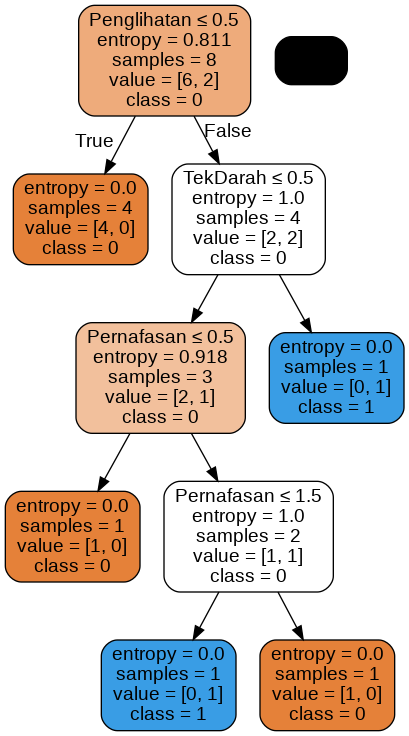

In [9]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from six import StringIO
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =value,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Play Tennis.png')
Image(graph.create_png())
